# Bank Telemarketing predictions

In [1]:
# For Dataset handling
import numpy as np
import pandas as pd

# For Checking Distribution Data
from scipy.stats import shapiro

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Checking Data Proportion

In [5]:
((df['y'].value_counts()/len(df))*100).round(2)

no     88.73
yes    11.27
Name: y, dtype: float64

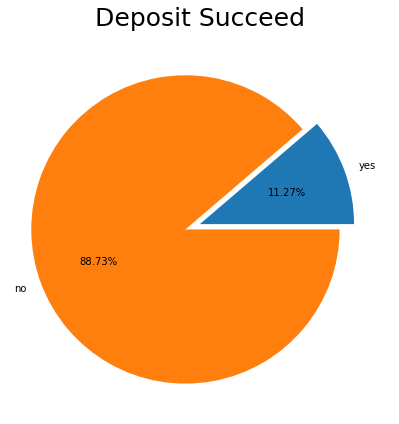

In [6]:
sizes = list(df['y'].value_counts().sort_values().values)
labels = list(df['y'].value_counts().sort_values().index)

explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, explode = explode,
        autopct=lambda p:f'{p:.2f}%')
plt.title('Deposit Succeed', fontsize=25)
plt.tight_layout()
plt.show()

We can see the data is imbalanced with proportion 88.73 % and 11.27 % for No and Yes anwers

## Checking Distribution of Data

In [7]:
df_numeric=df.select_dtypes(include=np.number)
df_numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [8]:
df_categorical=df.select_dtypes(include='object')
df_categorical.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [9]:
cek = df_numeric.columns

In [10]:
alpha = 0.05

In [11]:
for i in cek:
    print ([i])
    a, b = shapiro(df[i])
    print("test statistic", a, "p-value", b)
    if b < alpha :
        print("Not Normally distributed")
    else :
        print("Normal distributed")

['age']
test statistic 0.9572664499282837 p-value 0.0
Not Normally distributed
['duration']
test statistic 0.7216588258743286 p-value 0.0
Not Normally distributed
['campaign']
test statistic 0.5578195452690125 p-value 0.0
Not Normally distributed
['pdays']
test statistic 0.18294060230255127 p-value 0.0
Not Normally distributed
['previous']
test statistic 0.39124685525894165 p-value 0.0
Not Normally distributed
['emp.var.rate']
test statistic 0.7622500658035278 p-value 0.0
Not Normally distributed
['cons.price.idx']
test statistic 0.931542694568634 p-value 0.0
Not Normally distributed
['cons.conf.idx']
test statistic 0.9239304661750793 p-value 0.0
Not Normally distributed
['euribor3m']
test statistic 0.6861591339111328 p-value 0.0
Not Normally distributed
['nr.employed']
test statistic 0.7875500917434692 p-value 0.0
Not Normally distributed


## Checking Data Info and Statistical Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Statistical Data for Numerical Features**

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Statistical Data for Categorical Features**

In [14]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Data Cleaning

## check duplicate values

In [15]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [16]:
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

## Handling Missing Value

In [17]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    df[column] = df[column].replace('unknown', np.NaN)

In [18]:
df.isna().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [19]:
for column in ['job','marital','education','default', 'housing', 'loan']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Data Correlation and Outliers

we need to check the correlation of each features towards label 'y'. Besides, doing correlation checking for Feature Selection and EDA, this also would help to decide how to handle it if there is outliers

the correlation ratio is a measure of the curvilinear relationship between the statistical dispersion within individual categories

## Correlation Matrix

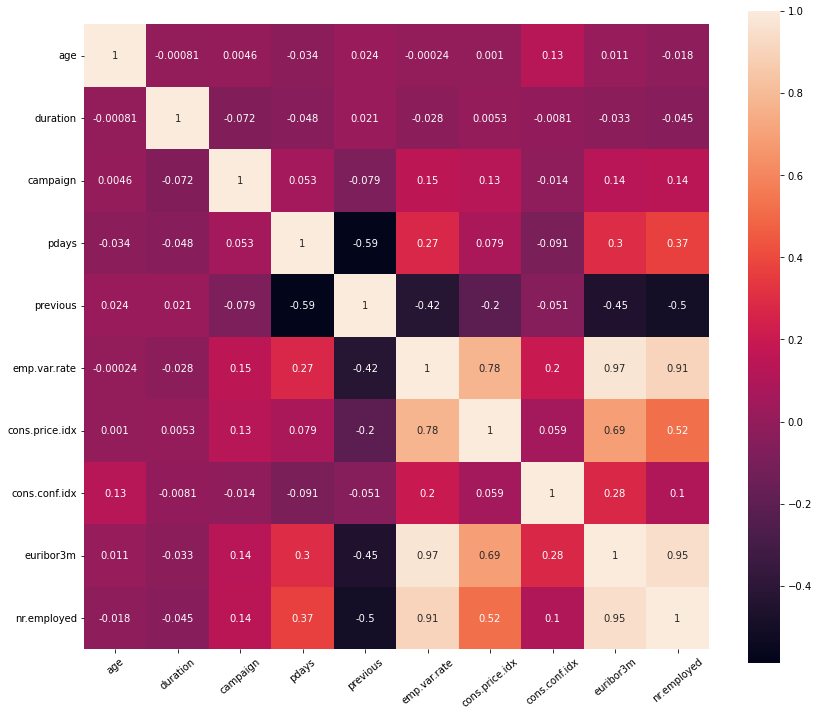

In [21]:
cm = df[df.select_dtypes(['int64', 'float64']).columns].corr()

f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2g', 
            annot_kws={'size': 10},
           )
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
ax.set_yticklabels(ax.get_yticklabels(),rotation=0)

plt.show()

## Handling Outliers

### Finding outliers

- From result in statistical data (point D.3), we checked outliers for Age, Campaign and cons.conf.idx features
- From correlation ratio, we got correlation value for Age and Campaign as much as 0.03 and 0.07 accordingly.

### 1. Age

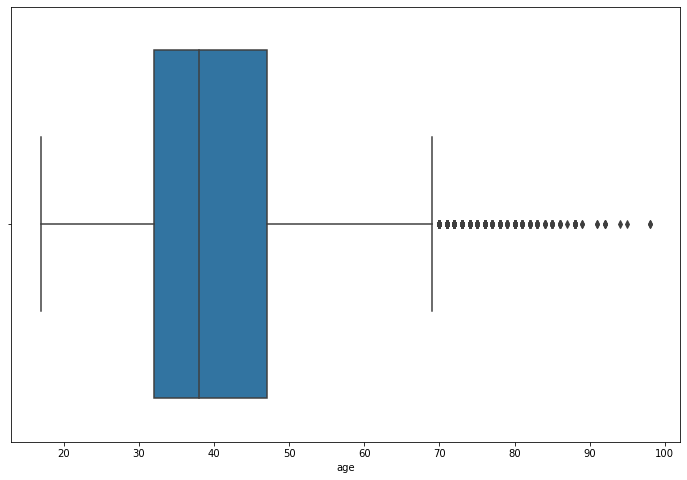

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age", hue='y')

plt.show()

After knowing the outliers of age features, we need to know how diverse age outliers towards "job" features because "job" features has the highest crammers v correlation score and it might be impacted if we remove the outliers

<AxesSubplot:xlabel='age', ylabel='job'>

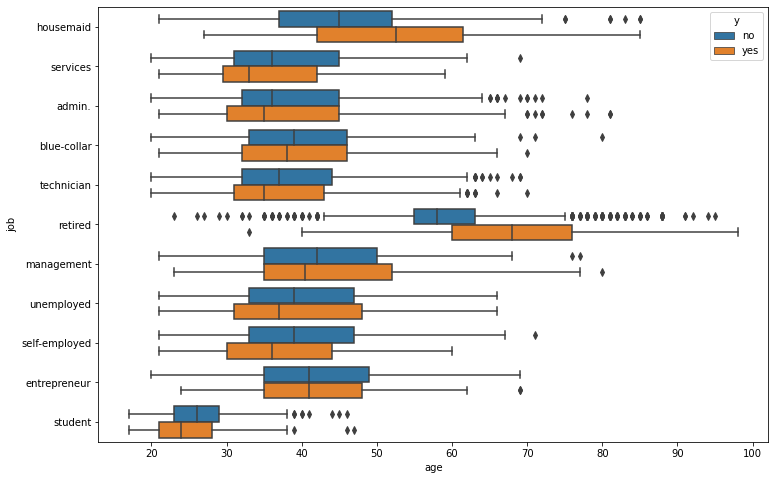

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age", y="job", hue='y')

We could see that job crammer's v correlation is decrease if we remove age outliers. Thus, we're NOT removing outliers in "age" features

### 2. Campaign

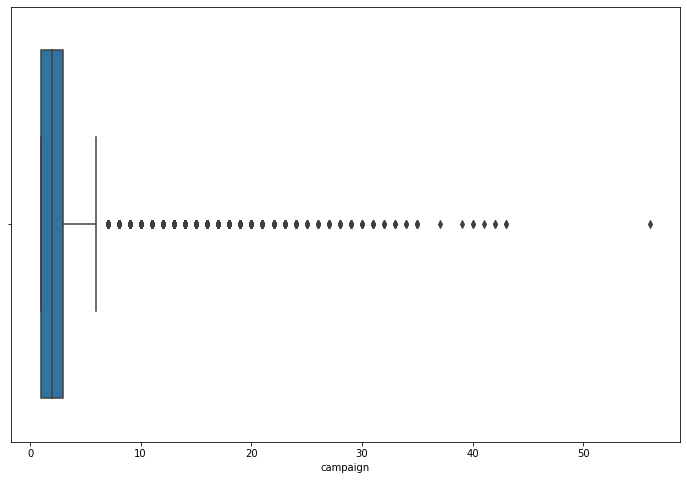

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="campaign", hue='y')

plt.show()

### 3. cons.conf.idx

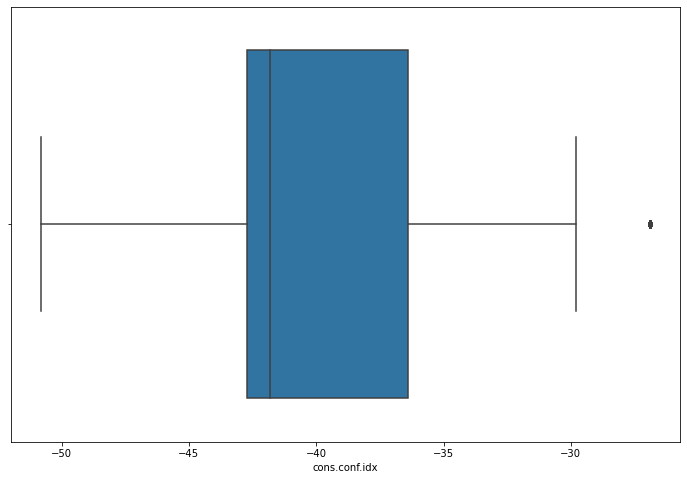

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="cons.conf.idx", hue='y')

plt.show()

<AxesSubplot:xlabel='cons.conf.idx', ylabel='job'>

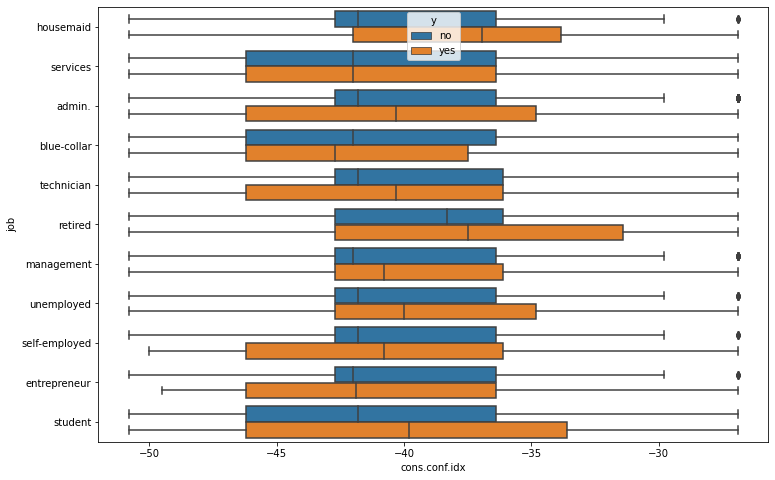

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="cons.conf.idx", y="job", hue='y')

We could see that job crammer's v correlation is decrease if we remove cons.conf.idx outliers. Thus, we're NOT removing outliers in "cons.conf.idx" features

# Exploratory Data Analysis

In [27]:
## checking data pattern of each column 

In [28]:
df['y'] = df['y'].apply(lambda y: 1 if y == 'yes' else 0)

## Which customer age group is the most targeted on previous campaign  ?

We categorize age into 3 groups :
16 - 31 = Young Adult
32 - 46 = Adult
47 - 100 = Elderly

In [29]:
bin_age = [16, 32, 47, 100]
label_age = ['Young Adult', 'Adult', 'Elderly']

In [30]:
df['age_group'] = pd.cut(df['age'], bins=bin_age, labels=label_age)

In [31]:
df['age_group'].value_counts()

Adult          20132
Young Adult    11173
Elderly         9871
Name: age_group, dtype: int64

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly


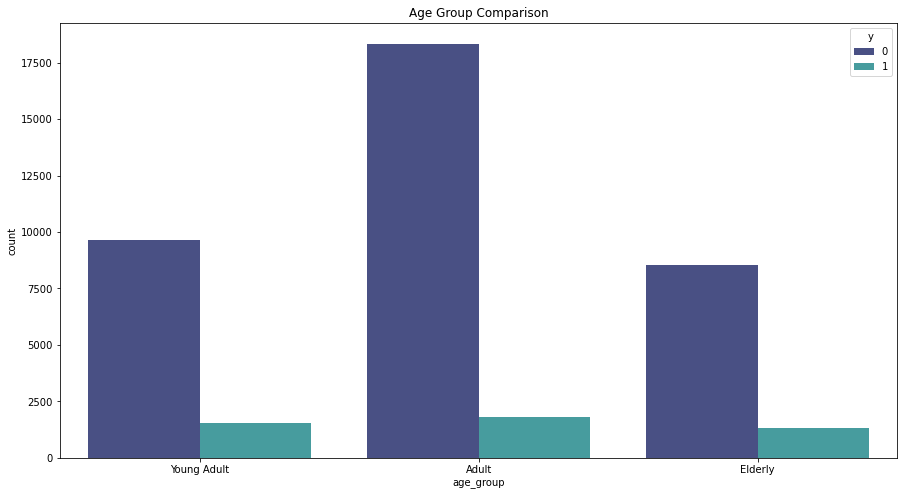

In [33]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["age_group"],hue=df["y"], data=df, palette='mako')
plt.title('Age Group Comparison')
plt.show()

In [34]:
age = ((pd.crosstab(index= df["age_group"], columns= df["y"], normalize="index"))*100).round(2)
age
age.sort_values(1,ascending=False)

y,0,1
age_group,,
Young Adult,86.32,13.68
Elderly,86.62,13.38
Adult,91.11,8.89


Young adult and elderly people have the highest percentage in opening the bank account

## Does marital status impact on decision opening term deposit ?

In [35]:
df['marital'].value_counts()

married     25001
single      11564
divorced     4611
Name: marital, dtype: int64

In [36]:
df['Marital_Status'] =  df['marital'].map({'married' : 'married','single': 'not married','divorced':'not married'})

In [37]:
df['Marital_Status'].value_counts()

married        25001
not married    16175
Name: Marital_Status, dtype: int64

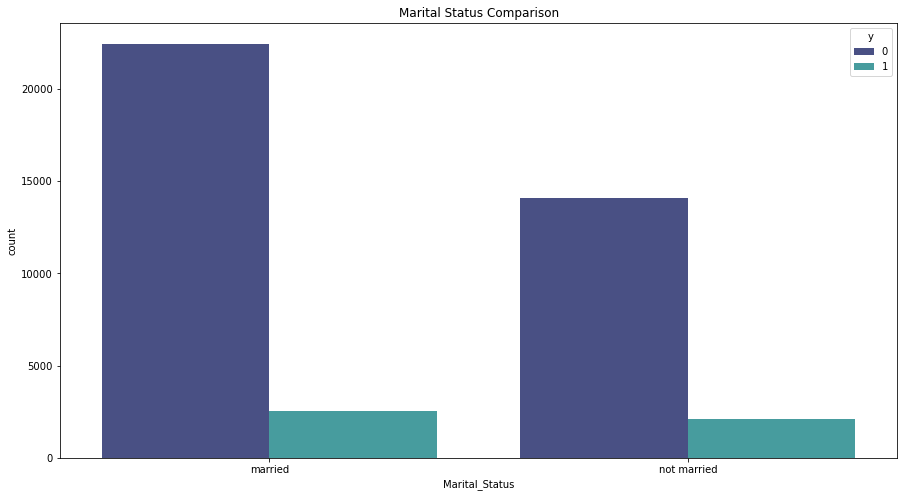

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Marital_Status"],hue=df["y"], data=df, palette='mako')
plt.title('Marital Status Comparison')
plt.show()

In [39]:
Marital = ((pd.crosstab(index= df["Marital_Status"], columns= df["y"], normalize="index"))*100).round(2)
Marital.sort_values(1,ascending=False)

y,0,1
Marital_Status,,
not married,87.04,12.96
married,89.83,10.17


Married people tend to opening the deposit with the percentage of 10.17% and not married with 12.96%

## Which job type tend to open the term deposit ?

In [40]:
df['job'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [41]:
job_map = { 'entrepreneur' : 'self-employed'
    
}

df['Job_Type'] = df['job'].replace(job_map)
df['Job_Type'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
self-employed     2877
retired           1718
housemaid         1060
unemployed        1014
student            875
Name: Job_Type, dtype: int64

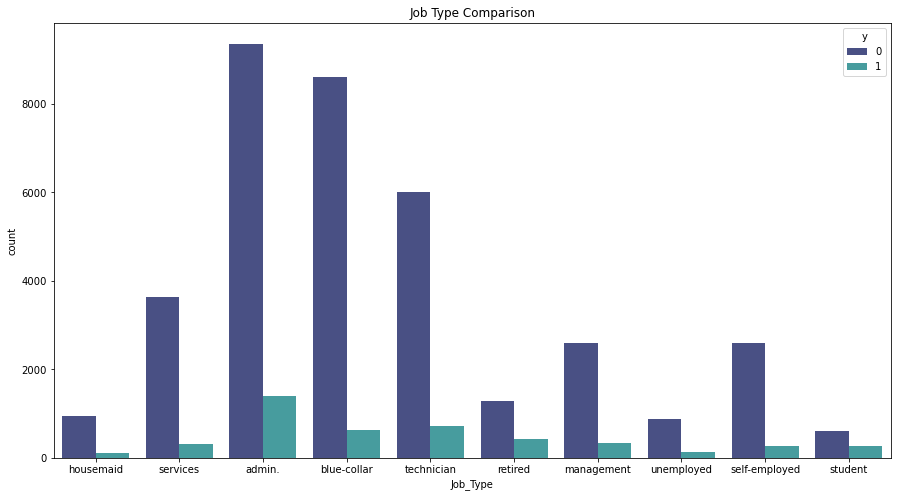

In [42]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df["Job_Type"],hue=df["y"], data=df, palette='mako')
plt.title('Job Type Comparison')
plt.show()

In [43]:
job = (pd.crosstab(index=df["Job_Type"], columns= df["y"], normalize= "index") *100).round(2)
job.sort_values(1, ascending=False)

y,0,1
Job_Type,,
student,68.57,31.43
retired,74.74,25.26
unemployed,85.80,14.20
admin.,87.09,12.91
management,88.78,11.22
technician,89.17,10.83
housemaid,90.00,10.00
self-employed,90.51,9.49
services,91.86,8.14


We can conclude that Job type Student, Retired and Unemployed customer are top 3 job type of customer who agree to open deposit term

# How socio economic attribute impact on customer decision ?

In [44]:
socio_economic = df.select_dtypes(['int64', 'float64'])
socio_economic = socio_economic.drop(columns=['age','duration','campaign','previous','y'])
socio_economic.head()

,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,999,1.1,93.994,-36.4,4.857,5191.0
1,999,1.1,93.994,-36.4,4.857,5191.0
2,999,1.1,93.994,-36.4,4.857,5191.0
3,999,1.1,93.994,-36.4,4.857,5191.0
4,999,1.1,93.994,-36.4,4.857,5191.0


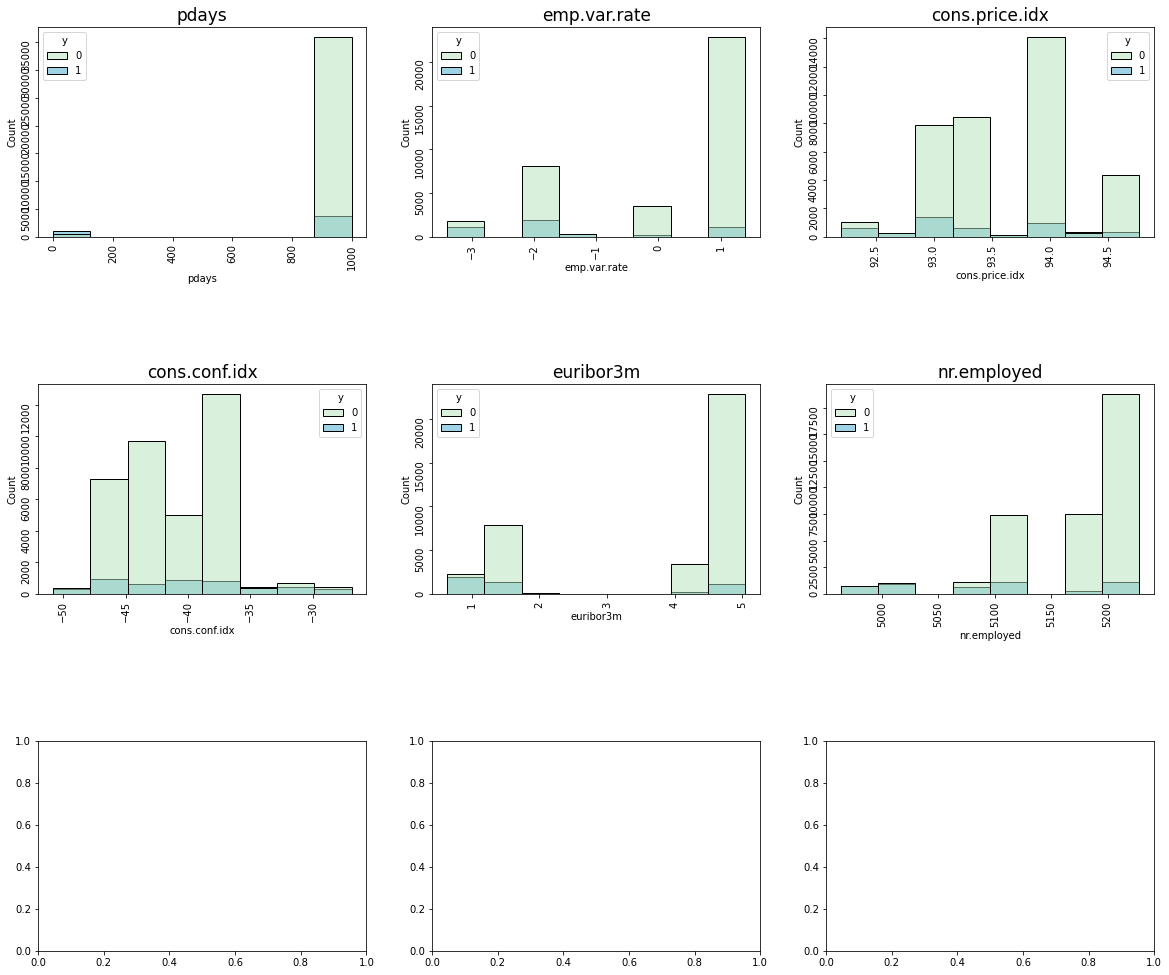

In [45]:
fig, ax = plt.subplots(3,3, figsize=(20,17))

socio_economic

ax = ax.ravel()
position = 0
for i in socio_economic:
    
    #order = df[i].value_counts().index
    sns.histplot(data=socio_economic, x=socio_economic[i], ax=ax[position], hue=df['y'], palette='GnBu', bins=8)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()

# Based on previous campaign, when is the best time customer tend to say "yes" ?

In [46]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

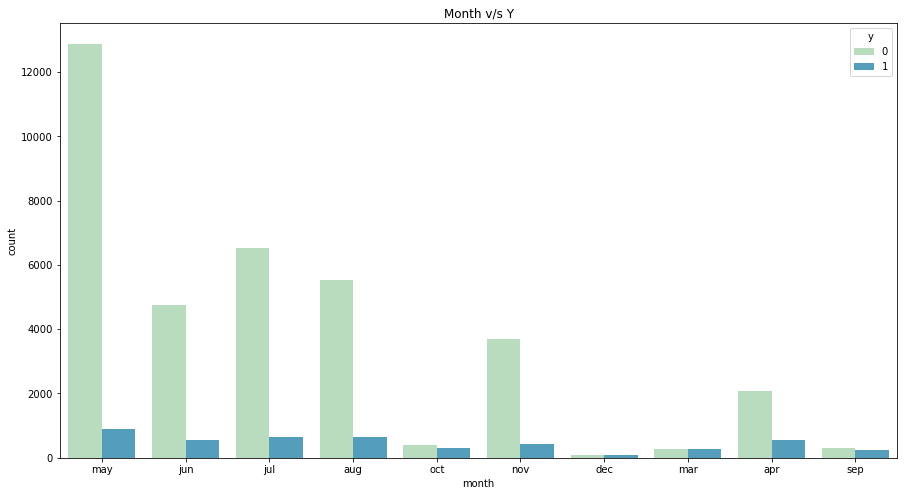

In [47]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x=df['month'], hue='y', palette='GnBu')
plt.title('Month v/s Y')
plt.show()


In [48]:
month = (pd.crosstab(index=df["month"], columns= df["y"], normalize= "index") *100).round(2)
month.sort_values(1, ascending=False)

y,0,1
month,,
mar,49.45,50.55
dec,51.10,48.90
sep,55.09,44.91
oct,56.07,43.93
apr,79.51,20.49
aug,89.39,10.61
jun,89.49,10.51
nov,89.85,10.15
jul,90.96,9.04


The highest percentage (50.55%) customer tend to say yes is on March, followed by December and September in the second and third place

In [49]:
comb = (pd.crosstab(index=[df["month"],df["day_of_week"]], columns= df["y"], normalize= "index")*100).round(2)
comb.sort_values(1, ascending=False).head(5)

y                      0      1
month day_of_week              
dec   tue          40.00  60.00
mar   wed          40.00  60.00
      tue          40.00  60.00
dec   wed          40.00  60.00
mar   fri          47.87  52.13

- We can see that December on Tuesday and Wednesday are the day when past campaign was getting the highest proportion of "yes" answer
- Following by March on Tuesday and Wednesday as well

# G. Modelling

## Handling Categorical Feature for Machine Learning

In [50]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
age_group         0
Marital_Status    0
Job_Type          0
dtype: int64

in this section all data we got from EDA analysis the will be handled to be used for Machine Learning, which will be tranform into numerical, we will use 3 encoding type to handle categorical data

- Binary Encoding
- Ordinal Encoding
- One-hot Encoding 

in this section we analyse the categorical feature to be then handled, and choosing between which encoder will be used

In [51]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,PolynomialFeatures,PowerTransformer,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [52]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,Marital_Status,Job_Type
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,housemaid
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult,married,services
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult,married,admin.
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services


Drop unused column for machine learning

In [53]:
df = df.drop(columns=["month"])
df = df.drop(columns=["day_of_week"])
df = df.drop(columns=["duration"])
df = df.drop(columns=["campaign"])

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,Marital_Status,Job_Type
0,56,housemaid,married,basic.4y,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,housemaid
1,57,services,married,high.school,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services
2,37,services,married,high.school,no,yes,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult,married,services
3,40,admin.,married,basic.6y,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Adult,married,admin.
4,56,services,married,high.school,no,no,yes,telephone,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,Elderly,married,services


In [55]:
df['loan'].value_counts()

no     34928
yes     6248
Name: loan, dtype: int64

In [56]:
df['education'].value_counts()

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [57]:
edu_map = { 'high.school' : 'school', 'basic.9y' : 'school', 'basic.4y' : 'school', 'basic.6y' : 'school'
    
}

df['Edu_Cat'] = df['education'].replace(edu_map)
df['Edu_Cat'].value_counts()

school                 22024
university.degree      13894
professional.course     5240
illiterate                18
Name: Edu_Cat, dtype: int64

In [58]:
def pcat(x):
    if x == 999:
        return 'Never'
    else:
        return 'Yes'

In [59]:
df['pdays'] = df['pdays'].apply(pcat)

In [60]:
df = df.drop(columns=["age"])
df = df.drop(columns=["job"])
df = df.drop(columns=["marital"])
df = df.drop(columns=["education"])
df = df.drop(columns=["nr.employed"])

In [61]:
df.head()

,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,housemaid,school
1,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school
2,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Adult,married,services,school
3,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Adult,married,admin.,school
4,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school


In [62]:
df.tail()

,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Marital_Status,Job_Type,Edu_Cat
41183,no,yes,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,1,Elderly,married,retired,professional.course
41184,no,no,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,0,Adult,married,blue-collar,professional.course
41185,no,yes,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,0,Elderly,married,retired,university.degree
41186,no,no,no,cellular,Never,0,nonexistent,-1.1,94.767,-50.8,1.028,1,Adult,married,technician,professional.course
41187,no,yes,no,cellular,Never,1,failure,-1.1,94.767,-50.8,1.028,0,Elderly,married,retired,professional.course


SUMMARY FOR FEATURE HANDLING 

all the feature for machine learning will be handled as below

Ordinal Encoding:
    - Age Group 
    - Edu_Cat

One-hot Encoding:
    - poutcome
    - Job_Type

Binary Encoding:
    - Marital
    - Default
    - Housing
    - Loan
    - Contact
    - pdays

## Data Splitting

In [63]:
x = df.drop(columns='y')
y = df['y']

In [64]:
x.shape

(41176, 15)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,stratify=y,random_state=42)

## Machine Learning Function

In [66]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score

Function to simplify evaluation matrix

In [67]:
def log_evaluation(data_sample_train,data_sample_test, aktual_train,aktual_test, model):
    hasil_model_train = model.predict(data_sample_train)
    accuracy_train = accuracy_score(aktual_train, hasil_model_train)
    recall_train = recall_score(aktual_train, hasil_model_train)
    precision_train = precision_score(aktual_train, hasil_model_train)
    f1_train = f1_score(aktual_train, hasil_model_train)
    rocauc_train = roc_auc_score(aktual_train,hasil_model_train)

    hasil_model_test = model.predict(data_sample_test)
    accuracy_test = accuracy_score(aktual_test, hasil_model_test)
    recall_test = recall_score(aktual_test, hasil_model_test)
    precision_test = precision_score(aktual_test, hasil_model_test)
    f1_test = f1_score(aktual_test, hasil_model_test)
    rocauc_test = roc_auc_score(aktual_test,hasil_model_test)
    
    cm = confusion_matrix(aktual_test, hasil_model_test, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = ["akt1", "akt0"],columns=["pred 1" , "pred 0"])
    cr = classification_report(aktual_test, hasil_model_test)


    hasil_evaluation = pd.DataFrame(data= {"Training" : [accuracy_train, recall_train, precision_train,f1_train,rocauc_train],"Testing" : [accuracy_test, recall_test, precision_test,f1_test,rocauc_test]}, index=["accuracy", "recall" , "precission", "F1 Score", "ROCAUC"] )

    return hasil_model_train, hasil_model_test, hasil_evaluation, df_cm, cr

In [68]:
df.head()

,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y,age_group,Marital_Status,Job_Type,Edu_Cat
0,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,housemaid,school
1,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school
2,no,yes,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Adult,married,services,school
3,no,no,no,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Adult,married,admin.,school
4,no,no,yes,telephone,Never,0,nonexistent,1.1,93.994,-36.4,4.857,0,Elderly,married,services,school


## Pipeline Preprocessing

In [69]:
num_columns = ['previous','emp.var.rate','cons.price.idx','cons.conf.idx',"euribor3m",]

cat_columns = ["Marital_Status", "default","housing","loan","contact","pdays","poutcome","Job_Type","age_group","Edu_Cat"]

binary_columns = ["Marital_Status", "default","housing","loan","contact","pdays"]

OH_columns = ["poutcome","Job_Type"]

ordinal1_columns = ["age_group"]

ordinal2_columns = ["Edu_Cat"]

In [70]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

## Base Modeling

### LOGISTIC REGRESSION BASE MODEL

In [71]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
 
])

Pipe_lr = Pipeline([
    ('prep',preprocessor),
    ('algo',LogisticRegression(solver='liblinear'))

])

In [72]:
Pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
                                                   'Job_Type', 'age_group',
                                                   'Edu_Cat'])])),
                ('algo', LogisticRegression(solver='liblinear'))])

In [73]:
lr_hasil_train, lr_hasil_test, lr_evaluation, lr_cm, lr_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_lr)

In [74]:
lr_evaluation

,Training,Testing
accuracy,0.898907,0.897644
recall,0.193748,0.178879
precission,0.680227,0.672065
F1 Score,0.301594,0.282553
ROCAUC,0.591092,0.583898


In [75]:
lr_cm

,pred 1,pred 0
akt1,166,762
akt0,81,7227


In [76]:
print(lr_cr)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7308
           1       0.67      0.18      0.28       928

    accuracy                           0.90      8236
   macro avg       0.79      0.58      0.61      8236
weighted avg       0.88      0.90      0.87      8236



### SVM BASE MODEL

In [77]:


num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',RobustScaler())
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns)
    
])

Pipe_SVC = Pipeline([
    ('prep',preprocessor),
    ('algo',SVC(max_iter=300,probability=True))

])

In [78]:
Pipe_SVC.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
                                                   'Job_Type', 'age_group',
                                                   'Edu_Cat'])])),
                ('algo', SVC(max_iter=300, probability=True))])

In [79]:
svm_hasil_train, svm_hasil_test, svm_evaluation, svm_cm, svm_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_SVC)

In [80]:
svm_evaluation

,Training,Testing
accuracy,0.617547,0.621054
recall,0.443277,0.441810
precission,0.135091,0.136077
F1 Score,0.207075,0.208069
ROCAUC,0.541475,0.542813


In [81]:
svm_cm

,pred 1,pred 0
akt1,410,518
akt0,2603,4705


In [82]:
print(svm_cr)

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      7308
           1       0.14      0.44      0.21       928

    accuracy                           0.62      8236
   macro avg       0.52      0.54      0.48      8236
weighted avg       0.81      0.62      0.69      8236



## XGBOOST Base Model

In [83]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_xgb = Pipeline([
    ('prep',preprocessor),
    ('algo',GradientBoostingClassifier())

])

In [84]:
Pipe_xgb.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
                                                   'Job_Type', 'age_group',
                                                   'Edu_Cat'])])),
                ('algo', GradientBoostingClassifier())])

In [85]:
xgb_hasil_train, xgb_hasil_test, xgb_evaluation, xgb_cm, xgb_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_xgb)

In [86]:
xgb_evaluation

,Training,Testing
accuracy,0.903916,0.898130
recall,0.256265,0.217672
precission,0.701327,0.641270
F1 Score,0.375370,0.325020
ROCAUC,0.621205,0.601105


In [87]:
xgb_cm

,pred 1,pred 0
akt1,202,726
akt0,113,7195


In [88]:
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.64      0.22      0.33       928

    accuracy                           0.90      8236
   macro avg       0.77      0.60      0.63      8236
weighted avg       0.88      0.90      0.88      8236



### RANDOM FOREST BASE MODEL

In [89]:

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='mean'))
])


cat_pipeline = Pipeline([
    ('encoder',OneHotEncoder())
])



preprocessor = ColumnTransformer([
    ('numeric',num_pipeline,num_columns),
    ('categoric1',cat_pipeline,cat_columns),
])

Pipe_rf = Pipeline([
    ('prep',preprocessor),
    ('algo',RandomForestClassifier())

])

In [90]:
Pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'euribor3m']),
                                                 ('categoric1',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Marital_Status', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'pdays', 'poutcome',
                                                   'Job_Type', 'age_group',
                                                   'Edu_Cat'])])),
                ('algo', RandomForestClassifier())])

In [91]:
rf_hasil_train, rf_hasil_test, rf_evaluation, rf_cm, rf_cr = log_evaluation(x_train, x_test, y_train, y_test, Pipe_rf)

In [92]:
rf_evaluation

,Training,Testing
accuracy,0.960200,0.884046
recall,0.683913,0.284483
precission,0.948430,0.475676
F1 Score,0.794739,0.356035
ROCAUC,0.839596,0.622332


In [93]:
rf_cm

,pred 1,pred 0
akt1,264,664
akt0,291,7017


In [94]:
print(rf_cr)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7308
           1       0.48      0.28      0.36       928

    accuracy                           0.88      8236
   macro avg       0.69      0.62      0.65      8236
weighted avg       0.86      0.88      0.87      8236



# Hyperparameter Tuning

## XGBOOST

In [95]:
skf = StratifiedKFold(n_splits=4)

In [96]:
Pipe_xgb.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['Marital_Status', 'default', 'housing',
                                     'loan', 'contact', 'pdays', 'poutcome',
                                     'Job_Type', 'age_group', 'Edu_Cat'])])),
  ('algo', GradientBoostingClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'con

In [97]:
weights2 = np.arange(0.05,0.9,0.05)
weights2

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85])

In [142]:
pm_xgb = {
    'algo__n_estimators': [1000,1100],
    'algo__max_depth': np.arange(0,10,1),
    'algo__learning_rate': np.arange(0.1,1,0.2),
}

In [143]:
gs_xgb = GridSearchCV(Pipe_xgb, pm_xgb, cv = skf, n_jobs=-1)

In [144]:
gs_xgb.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
gs_xgb.best_params_

In [ ]:
xgb_t = gs_xgb.best_estimator_

In [ ]:
xgbt_hasil_train, xgbt_hasil_test, xgbt_evaluation, xgbt_cm, xgbt_cr = log_evaluation(x_train, x_test, y_train, y_test, xgb_t)

In [ ]:
xgbt_evaluation

In [ ]:
xgbt_cm

In [ ]:
print(xgbt_cr)

Comparison before and after parameter tuning

In [ ]:
pd.concat([xgb_evaluation,xgbt_evaluation], axis= 1)

## Random Forest

In [108]:
Pipe_rf.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer', SimpleImputer())]),
                                    ['previous', 'emp.var.rate', 'cons.price.idx',
                                     'cons.conf.idx', 'euribor3m']),
                                   ('categoric1',
                                    Pipeline(steps=[('encoder', OneHotEncoder())]),
                                    ['Marital_Status', 'default', 'housing',
                                     'loan', 'contact', 'pdays', 'poutcome',
                                     'Job_Type', 'age_group', 'Edu_Cat'])])),
  ('algo', RandomForestClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer', SimpleImputer())]),
                                  ['previous', 'emp.var.rate', 'cons.price.idx',
                                   'cons.co

In [109]:
weights2 = np.arange(0.1,0.9,0.1)
weights2

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [122]:
pm_rf = {
    'algo__n_estimators': [100, 500, 1000],
    'algo__max_depth': np.arange(0,10,1),
    #'algo__min_samples_split' : np.arange(1,200,1),
    #'algo__min_samples_leaf': np.arange(1,200,1),
    'algo__class_weight': [{0:x, 1:1.0-x} for x in weights2],
    #"algo__random_state" : [42]

}

In [123]:
gs_rft = GridSearchCV(Pipe_rf, pm_rf, cv = skf, n_jobs=-1)

In [124]:
gs_rft.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                                          'euribor3m']),
                                                                        ('categoric1',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Marital_Status'...
                                                                          'Edu_Cat'])])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__class_weight': [{0: 0.1, 1: 0.9},
                                                {0: 0.2, 1: 0.8},
                                                {0: 0.30000000000000004,
                                                 1: 0.7},
                                                {0: 0.4, 1: 0.6},
                                                {0: 0.5, 1: 0.5},
                                                {0: 0.6, 1: 0.4},
                                                {0: 0.7000000000000001,
                                                 1: 0.29999999999999993},
                                                {0: 0.8,
                                                 1: 0.19999999999999996}],
                         'algo__max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'algo__n_estimators': [100, 500, 1000]})

In [125]:
gs_rft.best_params_

{'algo__class_weight': {0: 0.4, 1: 0.6},
 'algo__max_depth': 7,
 'algo__n_estimators': 100}

In [126]:
rf_t = gs_rft.best_estimator_

In [127]:
rft_hasil_train, rft_hasil_test, rft_evaluation, rft_cm, rft_cr = log_evaluation(x_train, x_test, y_train, y_test, rf_t)

Comparison before and after parameter tuning

In [128]:
rft_evaluation

,Training,Testing
accuracy,0.904372,0.899466
recall,0.296147,0.254310
precission,0.671350,0.634409
F1 Score,0.410995,0.363077
ROCAUC,0.638870,0.617850


In [129]:
rft_cm

,pred 1,pred 0
akt1,236,692
akt0,136,7172


In [130]:
print(rft_cr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7308
           1       0.63      0.25      0.36       928

    accuracy                           0.90      8236
   macro avg       0.77      0.62      0.65      8236
weighted avg       0.88      0.90      0.88      8236



In [131]:
pd.concat([rf_evaluation,rft_evaluation], axis= 1)

,Training,Testing,Training,Testing
accuracy,0.960200,0.884046,0.904372,0.899466
recall,0.683913,0.284483,0.296147,0.254310
precission,0.948430,0.475676,0.671350,0.634409
F1 Score,0.794739,0.356035,0.410995,0.363077
ROCAUC,0.839596,0.622332,0.638870,0.617850


## Comparison XGBoost and Random Forest after Hyper Parameter Tuning

In [132]:
pd.concat([xgbt_evaluation,rft_evaluation], axis= 1).round(2)

,Training,Testing,Training,Testing
accuracy,0.90,0.90,0.90,0.90
recall,0.26,0.22,0.30,0.25
precission,0.70,0.64,0.67,0.63
F1 Score,0.38,0.33,0.41,0.36
ROCAUC,0.62,0.60,0.64,0.62


In [133]:
pd.concat([xgbt_cm,rft_cm], axis= 1)

,pred 1,pred 0,pred 1,pred 0
akt1,202,726,236,692
akt0,113,7195,136,7172


Based on confussion matrix and evaluation matrix above. XGBOOST algorithm is the best model for this dataset. 

# Probability

I would like to check probability of the "Yes" prediction by this model. By knowing this probability, we're able to prioritize which customer to call first and make the telemarketing more efficient

In [134]:
prob = xgb_t.predict_proba(x)

In [135]:
table_probability = pd.DataFrame(prob)
table_probability

,0,1
0,0.968294,0.031706
1,0.968294,0.031706
2,0.968968,0.031032
3,0.968555,0.031445
4,0.968294,0.031706
...,...,...
41171,0.533471,0.466529
41172,0.522244,0.477756
41173,0.529114,0.470886
41174,0.512174,0.487826


In [136]:
table_probability[1].round(1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
41171    0.5
41172    0.5
41173    0.5
41174    0.5
41175    0.3
Name: 1, Length: 41176, dtype: float64

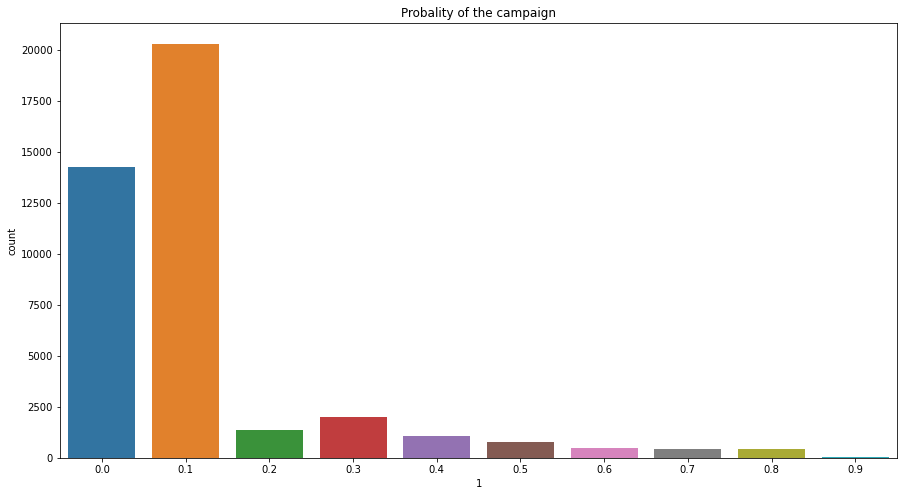

In [137]:
plt.figure(figsize=(15, 8))
sns.countplot(x= table_probability[1].round(1) , data=table_probability)
plt.title('Probality of the campaign')
plt.show()

In [138]:
table_probability = table_probability.drop(columns=0).round(1)
table_probability

,1
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
41171,0.5
41172,0.5
41173,0.5
41174,0.5


In [139]:
table_probability.value_counts()

1  
0.1    20310
0.0    14260
0.3     2010
0.2     1363
0.4     1087
0.5      760
0.6      460
0.7      446
0.8      429
0.9       51
dtype: int64

Based on value counts above. Telemarketing would focus to NOT calling those who have probability on 0.0 - 0.1 and focus on other probability instead